<a href="https://colab.research.google.com/github/safeai-snu/Econometrics/blob/main/Ch3.4.ARIMA_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

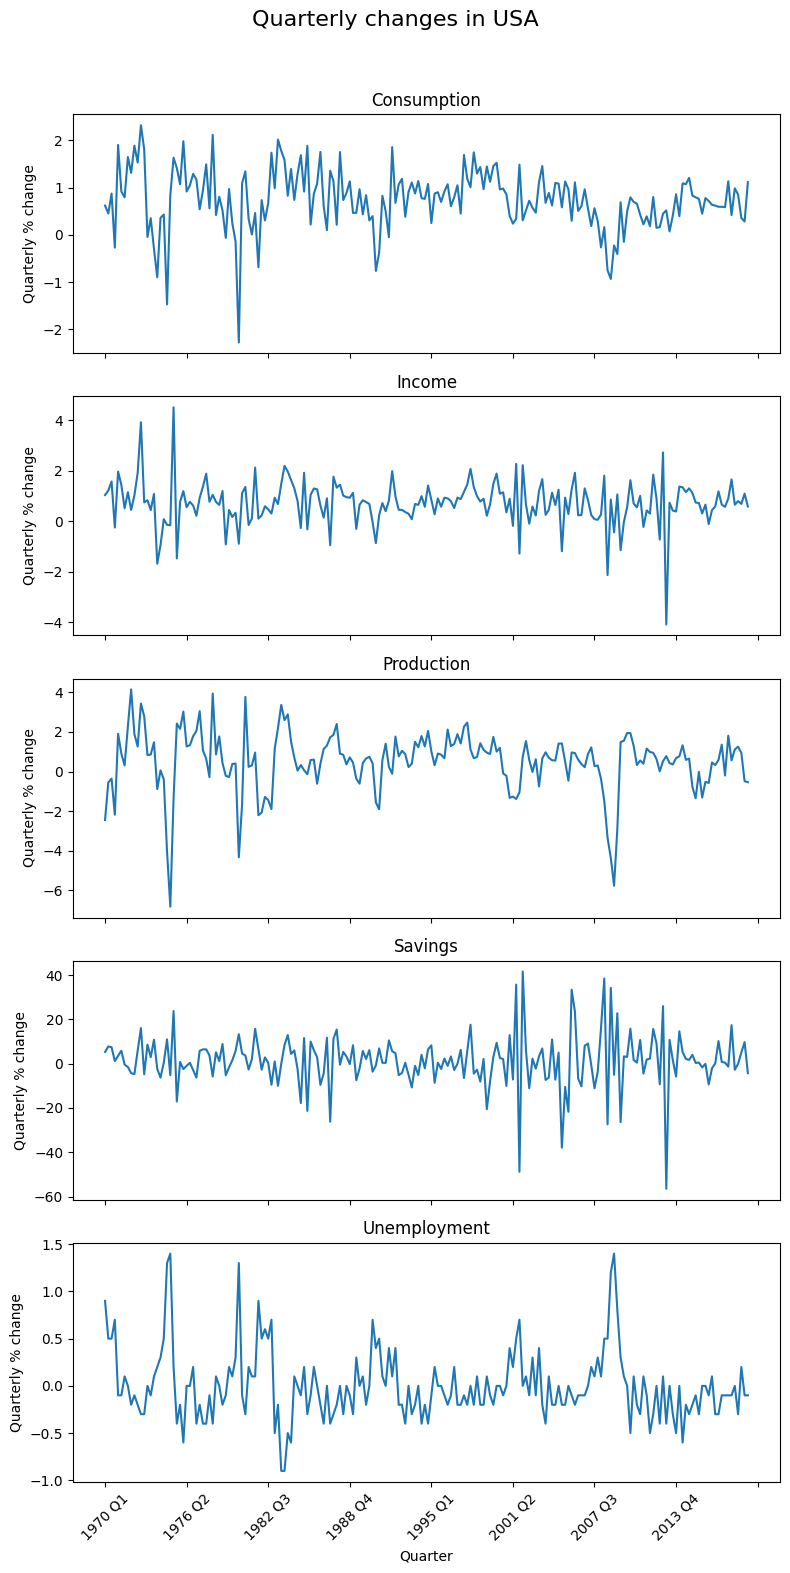

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

us_change = pd.read_csv("dataset/Ch.3/us_change.csv")

variables = ["Consumption", "Income", "Production", "Savings", "Unemployment"]

fig, axes = plt.subplots(len(variables), 1, figsize=(8, 16), sharex=True)

for i, var in enumerate(variables):
    sns.lineplot(x='Quarter', y=var, data=us_change, ax=axes[i])
    axes[i].set_ylabel("Quarterly % change")
    axes[i].set_title(var)

    axes[i].tick_params(axis='x', rotation=45)

    axes[i].xaxis.set_major_locator(plt.MaxNLocator(10))

plt.suptitle("Quarterly changes in USA", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


In [27]:
import pandas as pd
import statsmodels.api as sm

y = us_change['Consumption']
X = us_change['Income']

X = sm.add_constant(X)

model = sm.tsa.SARIMAX(y, exog=X, order=(1, 0, 2))
fit = model.fit(disp=False)

print(fit.summary())

ar1 = fit.params['ar.L1']
ma1 = fit.params['ma.L1']
ma2 = fit.params['ma.L2']
income_coef = fit.params['Income']
intercept = fit.params['const']

print(f"AR(1) coefficient: {ar1}")
print(f"MA(1) coefficient: {ma1}")
print(f"MA(2) coefficient: {ma2}")
print(f"Income coefficient: {income_coef}")
print(f"Intercept: {intercept}")

                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                  198
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -163.036
Date:                Tue, 13 Aug 2024   AIC                            338.072
Time:                        04:40:06   BIC                            357.802
Sample:                             0   HQIC                           346.058
                                - 198                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5949      0.085      7.028      0.000       0.429       0.761
Income         0.1976      0.034      5.855      0.000       0.131       0.264
ar.L1          0.7070      0.106      6.657      0.0

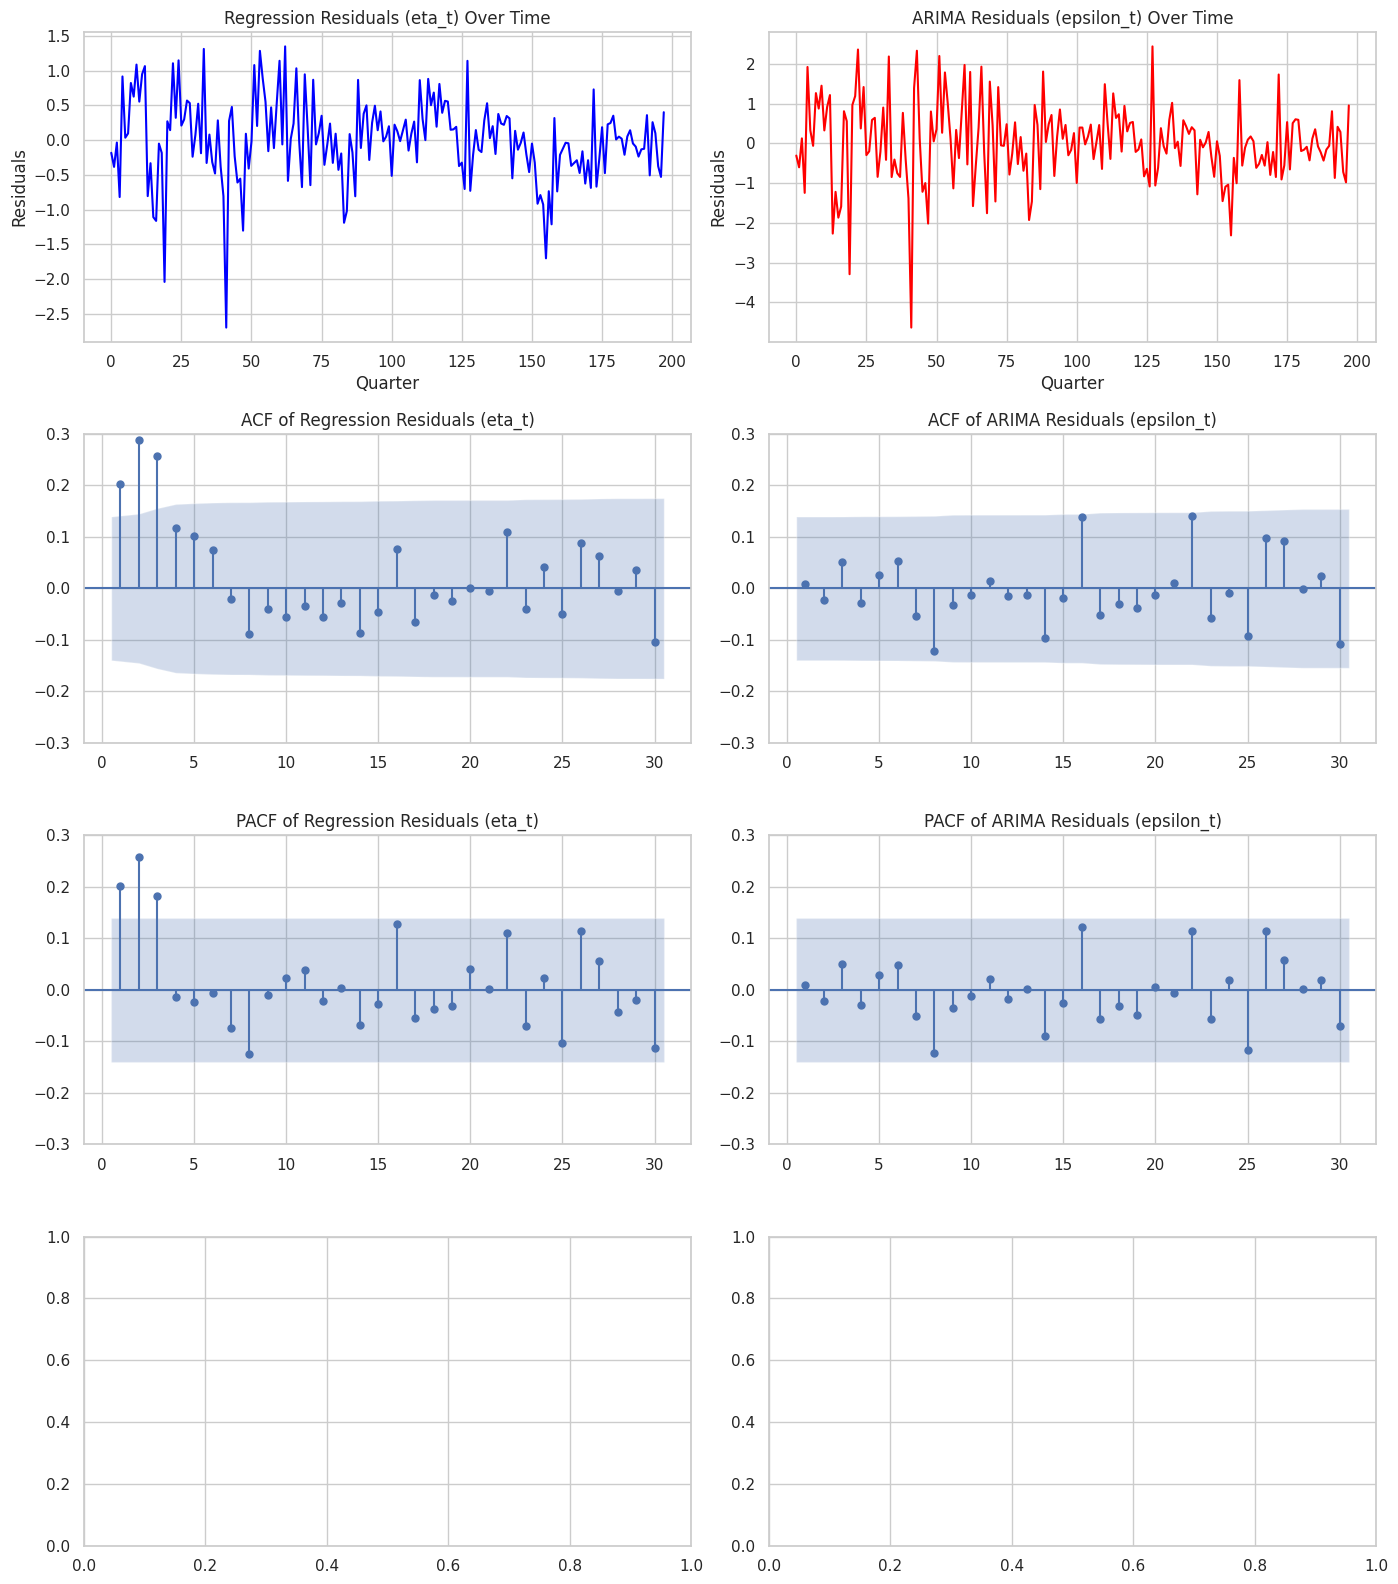

In [62]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

regression_residuals = y - X['Income']*income_coef - X['const']*intercept

arima_residuals = fit.filter_results.standardized_forecasts_error[0]

fig, ax = plt.subplots(4, 2, figsize=(14, 16))

ax[0, 0].plot(us_change.index, regression_residuals, label='Regression Residuals', color='blue')
ax[0, 0].set_title('Regression Residuals (eta_t) Over Time')
ax[0, 0].set_xlabel('Quarter')
ax[0, 0].set_ylabel('Residuals')

sm.graphics.tsa.plot_acf(regression_residuals, lags=30, ax=ax[1, 0], zero=False)
ax[1, 0].set_title('ACF of Regression Residuals (eta_t)')
ax[1, 0].set_ylim(-0.3,0.3)

sm.graphics.tsa.plot_pacf(regression_residuals, lags=30, ax=ax[2, 0], zero=False)
ax[2, 0].set_title('PACF of Regression Residuals (eta_t)')
ax[2, 0].set_ylim(bottom=min(regression_residuals.min(), -1), top=max(regression_residuals.max(), 1))
ax[2, 0].set_ylim(-0.3,0.3)

ax[0, 1].plot(us_change.index, arima_residuals, label='ARIMA Residuals', color='red')
ax[0, 1].set_title('ARIMA Residuals (epsilon_t) Over Time')
ax[0, 1].set_xlabel('Quarter')
ax[0, 1].set_ylabel('Residuals')

sm.graphics.tsa.plot_acf(arima_residuals, lags=30, ax=ax[1, 1], zero=False)
ax[1, 1].set_title('ACF of ARIMA Residuals (epsilon_t)')
ax[1, 1].set_ylim(-0.3,0.3)

sm.graphics.tsa.plot_pacf(arima_residuals, lags=30, ax=ax[2, 1], zero=False)
ax[2, 1].set_title('PACF of ARIMA Residuals (epsilon_t)')
ax[2, 1].set_ylim(bottom=min(arima_residuals.min(), -1), top=max(arima_residuals.max(), 1))
ax[2, 1].set_ylim(-0.3,0.3)

plt.tight_layout()
plt.show()
